In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-stock-data/all_stock_data.csv
/kaggle/input/financial-news-and-stock-price-integration-dataset/raw_analyst_ratings.csv


In [2]:
df=pd.read_csv('/kaggle/input/all-stock-data/all_stock_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,stock
0,2020-05-22,85.000000,87.669998,84.199997,84.980003,82.769760,5063100.0,A
1,2020-05-26,86.230003,86.790001,85.639999,86.129997,83.889854,3173400.0,A
2,2020-05-27,86.300003,86.480003,84.370003,86.180000,83.938553,1917600.0,A
3,2020-05-28,86.870003,87.849998,86.059998,86.690002,84.435280,1908700.0,A
4,2020-05-29,87.169998,88.489998,86.470001,88.139999,85.847580,2394500.0,A


In [3]:
conda install -c masdeseiscaracteres ta-lib

Retrieving notices: ...working... done
Channels:
 - masdeseiscaracteres
 - rapidsai
 - nvidia
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 24.3.0
    latest version: 24.4.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - ta-lib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libta-lib-0.4.0            |       hd590300_2         310 KB  conda-forge
    openssl-3.3.0              |       hd590300_0         2.8 MB  conda-forge
    ta-lib-0.4.28              |  py310h1f7b6fc_0         354 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.4 MB

The following NEW packages will be INS

In [4]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 42.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 2.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.3-cp310-cp310-linux_x86_64.whl size=293152 sha256=609634a01d5aab058176682772642e24cc08469ca6202dad2f35cb3bbe5191a6
  Stored in directory: /root/.cache/pip/wheels/0d/32/b7/cad9f818b37cf97df4c87a8308da86a433af81651d98f8d8aa
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pynance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import talib
import pynance as pn
import matplotlib.pyplot as plt


# Analysis Indicators with TA-Lib

In [7]:
# Example: Calculate 50-day and 200-day moving averages
df['MA50'] = talib.SMA(df['Close'], timeperiod=50)
df['MA200'] = talib.SMA(df['Close'], timeperiod=200)

In [8]:
# Calculate RSI (Relative Strength Index)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

In [9]:
# Calculate MACD (Moving Average Convergence Divergence)
macd, signal, _ = talib.MACD(df['Close'])
df['MACD'] = macd
df['Signal'] = signal

In [10]:
pip install pandas-datareader


Note: you may need to restart the kernel to use updated packages.


In [11]:

# Example: Calculate price-to-earnings ratio (P/E ratio)
# Calculate the earnings per share (EPS) using the adjusted closing price
earnings_per_share = df['Adj Close']

# Calculate the price per share (closing price)
price_per_share = df['Close']

# Calculate the P/E ratio
pe_ratio = price_per_share / earnings_per_share

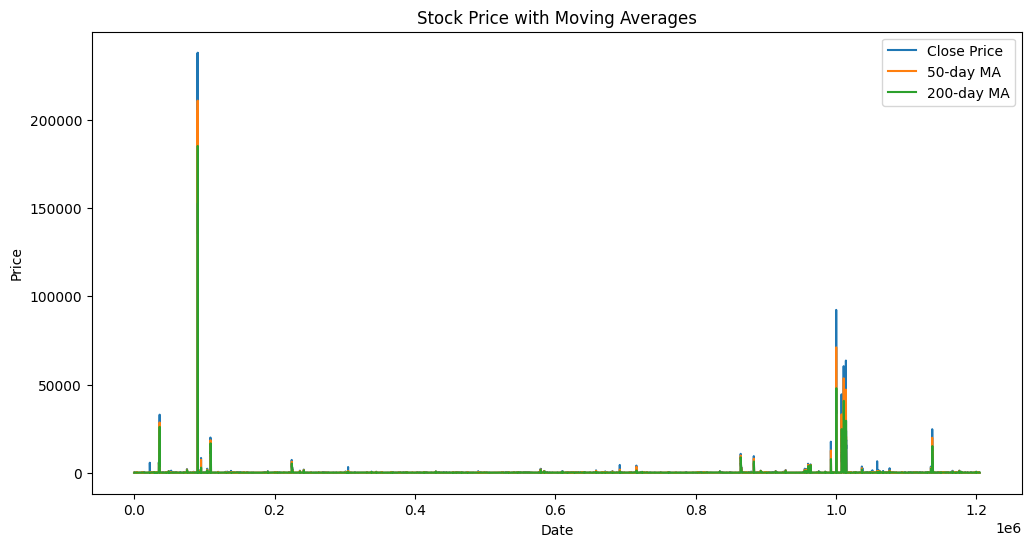

In [12]:
# Visualize the Data
# Plot stock price data along with calculated indicators and metrics
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA50'], label='50-day MA')
plt.plot(df['MA200'], label='200-day MA')
plt.legend()
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [13]:
df1=pd.read_csv('/kaggle/input/financial-news-and-stock-price-integration-dataset/raw_analyst_ratings.csv')
df1.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [14]:
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

In [15]:
df = df.set_index('Date')
df1 = df1.set_index('date')

In [16]:
# Convert index to DatetimeIndex first
df.index = pd.to_datetime(df.index)
df1.index = pd.to_datetime(df1.index)

In [19]:
# Convert the index to UTC timezone if it's already timezone-aware
df.index = df.index.tz_convert('UTC')
df1.index = df1.index.tz_convert('UTC')


In [20]:
# Align datasets by dates (merge on index)
aligned_data = df.merge(df1, how='inner', left_index=True, right_index=True)

# If you want to fill missing values with a specific method, you can use the fillna() function
aligned_data = aligned_data.fillna(method='ffill')  # Forward fill missing values

/tmp/ipykernel_33/1587621167.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aligned_data = aligned_data.fillna(method='ffill')  # Forward fill missing values


In [21]:
from textblob import TextBlob

In [24]:
# Calculate polarity score for each headline
aligned_data['Polarity'] = aligned_data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate compound sentiment score for each day
compound_sentiment = aligned_data.groupby(pd.Grouper(freq='D'))['Polarity'].mean()

# Calculate daily stock returns
aligned_data['Daily_Return'] = aligned_data['Close'].pct_change()

# Align compound sentiment scores and daily stock returns
aligned_data['Compound_Sentiment'] = aligned_data.index.map(compound_sentiment)

# Calculate correlation between compound sentiment scores and daily stock returns
correlation = aligned_data['Compound_Sentiment'].corr(aligned_data['Daily_Return'])

print("Correlation between compound sentiment scores and stock returns:", correlation)


Correlation between compound sentiment scores and stock returns: nan


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
